In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from copy import deepcopy as copy
import tqdm

In [2]:
class World:
    def __init__(self, create=1.0, death=0.1, reproduce=0, seed=0):
        """
        Parameters
        ----------
        create: float - % chance to create a new creature each turn.
        death: float - % chance that any given creature dies each turn.
        reproduce: float - % chance for any given creature to reproduce each turn
        seed: int - How many creatures to initially seed with.
        """
        
        if (create < 0) | (create > 1):
            raise Exception('%s is an invalid create, create must be between 0 and 1!' % create)
        if (death < 0) | (death > 1):
            raise Exception('%s is an invalid death, death must be between 0 and 1!' % death)
        if (reproduce < 0) | (reproduce > 1):
            raise Exception('%s is an invalid reproduce, reproduce must be between 0 and 1!' % reproduce)
            
        self.create = create
        self.creature = {
            'death': death,
            'reproduce': reproduce
        }
        self.creatures = []
        self.run_record = []
        
        self.new_creature(seed, 'seed')
        
    def run(self):
        self.death_run()
        self.reproduce_run()
        self.create_run()
        self.record()
    
    def death_run(self):
        creature_death_prob = [creature['death'] for creature in sim.creatures]
        creature_dies = np.random.rand(len(sim.creatures)) <= creature_death_prob
        death_idx = np.flip(np.where(creature_dies == True)[0])
        for idx in death_idx: del self.creatures[idx]
            
    def reproduce_run(self):
        creature_reproduce_prob = [creature['reproduce'] for creature in sim.creatures]
        creature_reproduces = np.random.rand(len(sim.creatures)) <= creature_reproduce_prob
        reproduce_count = sum(creature_reproduces)
        self.new_creature(reproduce_count, 'reproduce')
    
    def create_run(self):
        if np.random.rand() <= self.create: self.new_creature(1, 'create')
            
    def new_creature(self, count, created_by):
        new_creature = {
            **self.creature,
            'created_by': created_by
        }
        self.creatures.extend([new_creature]*count)
            
    def record(self):
        creature_count = {
            'seed': 0,
            'create': 0,
            'reproduce': 0
        }
        for creature in self.creatures:
            creature_count[creature['created_by']] += 1
        self.run_record.append(creature_count)

In [3]:
sim = World(create=0.0, death=0.05, reproduce=0.0501, seed=100)
t = tqdm.tnrange(10000)
for _ in t:
    sim.run()
    t.set_postfix({'pop': len(sim.creatures)})

In [4]:
print('mean:', pd.DataFrame(sim.run_record).sum(axis=1).mean())
print('stdev:', pd.DataFrame(sim.run_record).sum(axis=1).std())

mean: 5.0242
stdev: 14.806118210849437


<Figure size 1296x720 with 0 Axes>

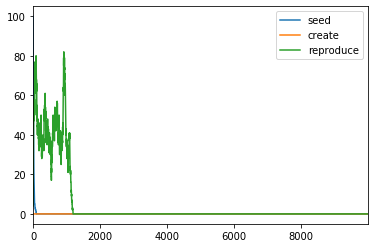

In [5]:
plt.figure(figsize=(18,10))
pd.DataFrame(sim.run_record).plot()